# EDA

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
## Cargo los datos desde PostgreSQL
from sqlalchemy import create_engine

# Parámetros de conexión
db_user = 'agustinrivas'
db_host = 'localhost'
db_port = '5432'
db_name = 'dataset_ml'

engine = create_engine(f'postgresql://{db_user}@{db_host}:{db_port}/{db_name}')
df = pd.read_sql('SELECT * FROM training_dataset', engine)

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
## Nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Univariado

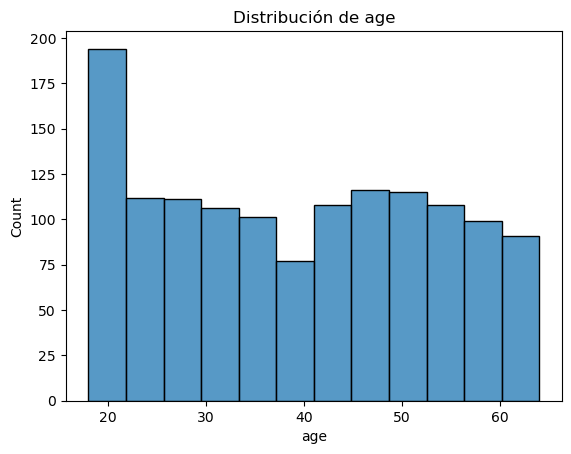

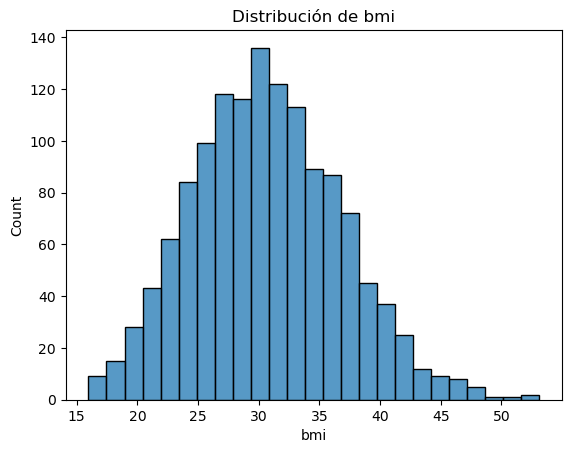

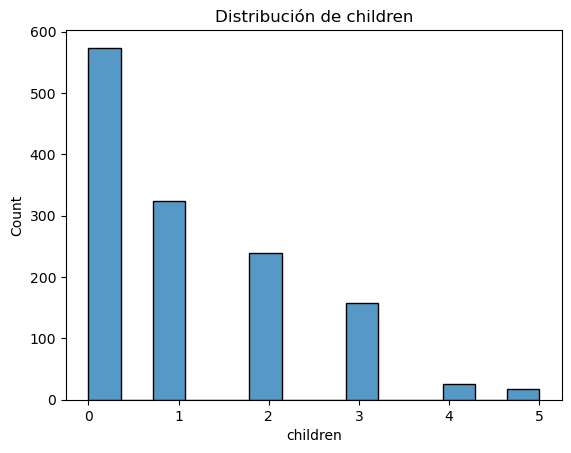

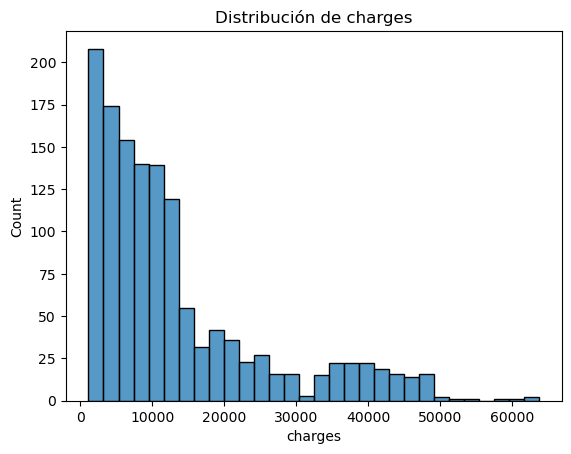

In [51]:
num_cols = ['age', 'bmi', 'children', 'charges']
for i in num_cols:
    sns.histplot(df[i])
    plt.title(f'Distribución de {i}')
    plt.show()

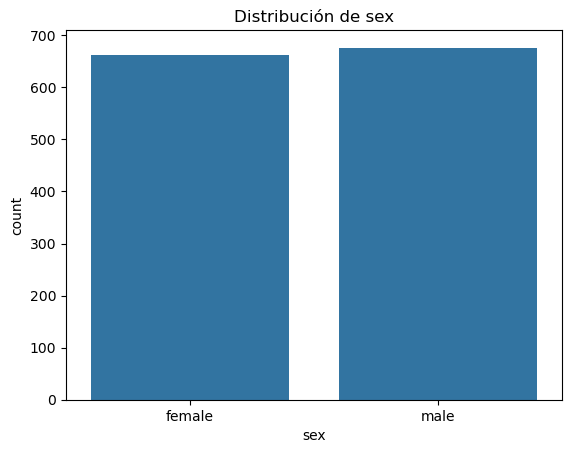

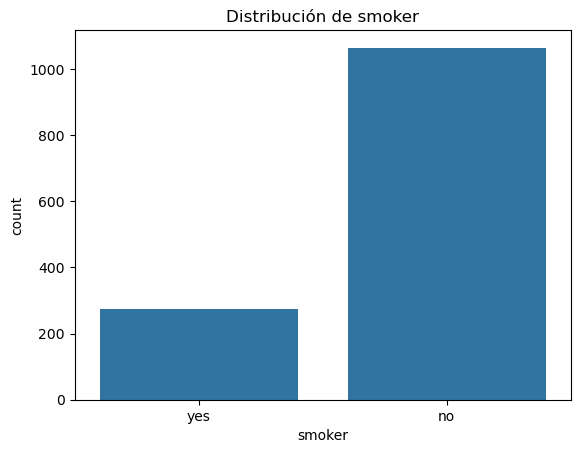

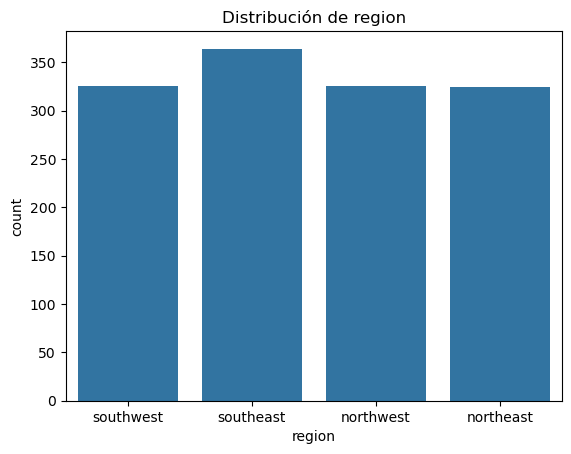

In [53]:
cat_cols = ['sex', 'smoker', 'region']
for i in cat_cols:
    sns.countplot(x=i, data=df)
    plt.title(f'Distribución de {i}')
    plt.show()

## Bivariado

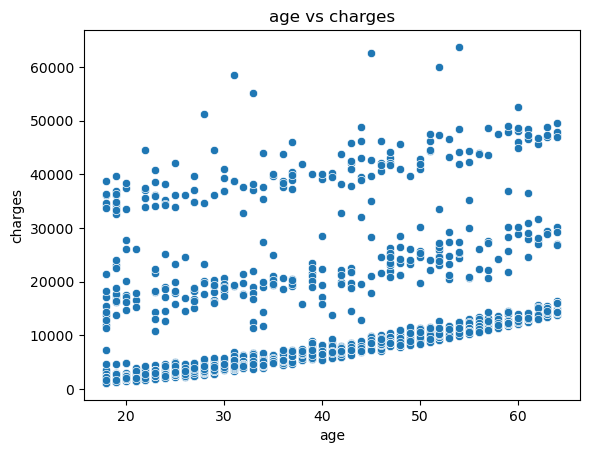

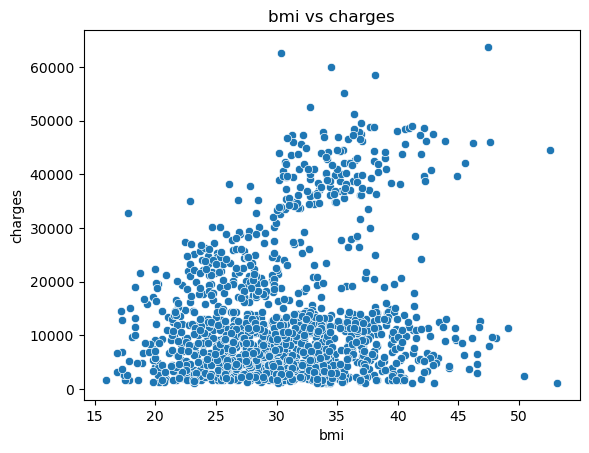

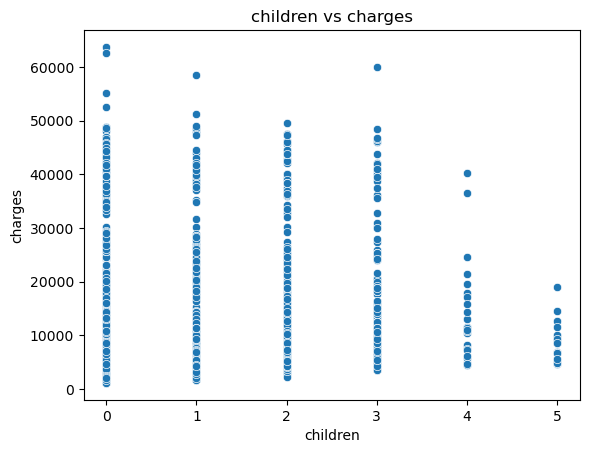

In [57]:
for i in ['age', 'bmi', 'children']:
    sns.scatterplot(x=i, y='charges', data=df)
    plt.title(f'{i} vs charges')
    plt.show()

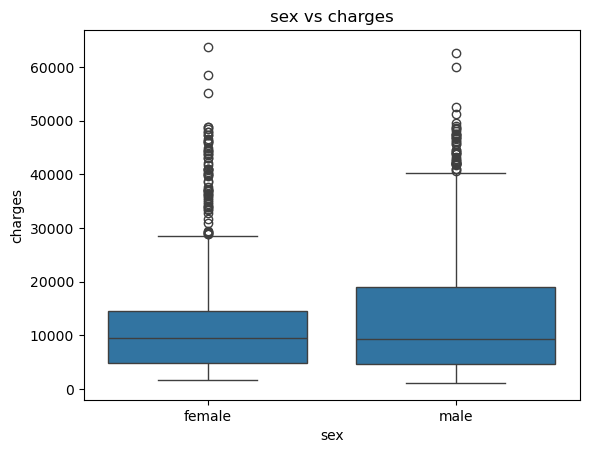

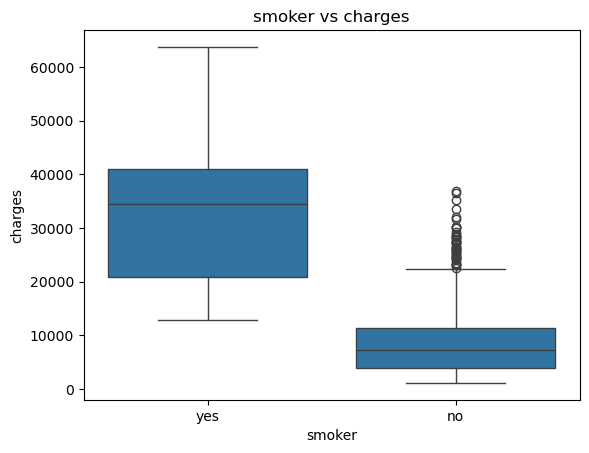

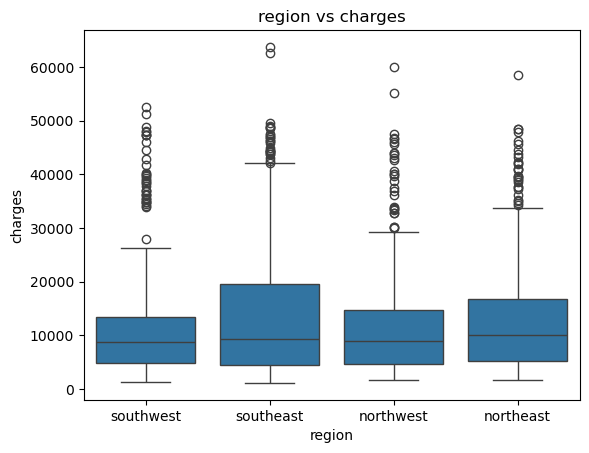

In [59]:
for i in ['sex', 'smoker', 'region']:
    sns.boxplot(x=i, y='charges', data=df)
    plt.title(f'{i} vs charges')
    plt.show()

## Correlación

<Axes: >

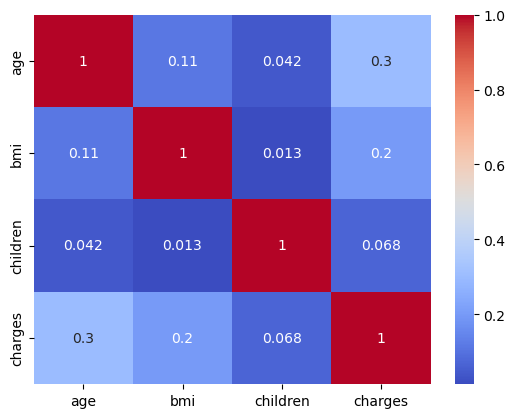

In [71]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')